# Uso de gráficos para interpretar la información de un archivo csv

## 1. Preprocesamiento de los datos

In [4]:
#Importación de bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [5]:
#Instalación de plotly

!pip install plotly 
!pip install plotly --upgrade
!pip install nbformat>=4.2.0


In [6]:
#creación del DataFrame

df= pd.read_csv(r"C:\Users\mayin\Documents\GitHub\Airports\Busiest-European-Airports-2016.csv")

In [7]:
#Visualización de la forma del df

df.shape

(100, 8)

In [8]:
#Visualización general del tipo y forma del df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Rank2016              100 non-null    int64 
 1   Airport               100 non-null    object
 2   City served           100 non-null    object
 3   Country               100 non-null    object
 4   Passengers2016        100 non-null    int64 
 5   Passengers2015        100 non-null    int64 
 6   Change 2016-2015-Num  100 non-null    int64 
 7   Change 2016-2015-%    100 non-null    object
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [9]:
#Consulta de columnas. En este caso no para espacios

df.columns

Index(['Rank2016', 'Airport', 'City served', 'Country', 'Passengers2016',
       'Passengers2015', 'Change 2016-2015-Num', 'Change 2016-2015-%'],
      dtype='object')

In [10]:
#Impresión de las 5 primeras filas para ver qué tipo de información hay dentro de las columnas

df.head(5)

,Rank2016,Airport,City served,Country,Passengers2016,Passengers2015,Change 2016-2015-Num,Change 2016-2015-%
0,1,Heathrow Airport,London,United Kingdom,75711130,74985475,725655,"%0,97"
1,2,Charles de Gaulle Airport,Paris,France,65933145,65766986,166159,"%0,25"
2,3,Amsterdam Airport Schiphol,Amsterdam,Netherlands,63625664,58284848,5340816,"%9,16"
3,4,Frankfurt Airport,Frankfurt,Germany,60786937,61032022,-245085,"-%0,40"
4,5,Istanbul Atatürk Airport,Istanbul,Turkey,60415470,61322729,-907259,"-%1,48"


In [11]:
#Búsqueda de valores nulos. En este caso no hay duplicados

df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool>

In [12]:
#Comprobación de existencia de valores nulos. En este caso no hay

df.isnull().sum()/len(df)*100

Rank2016                0.0
Airport                 0.0
City served             0.0
Country                 0.0
Passengers2016          0.0
Passengers2015          0.0
Change 2016-2015-Num    0.0
Change 2016-2015-%      0.0
dtype: float64

<Axes: >

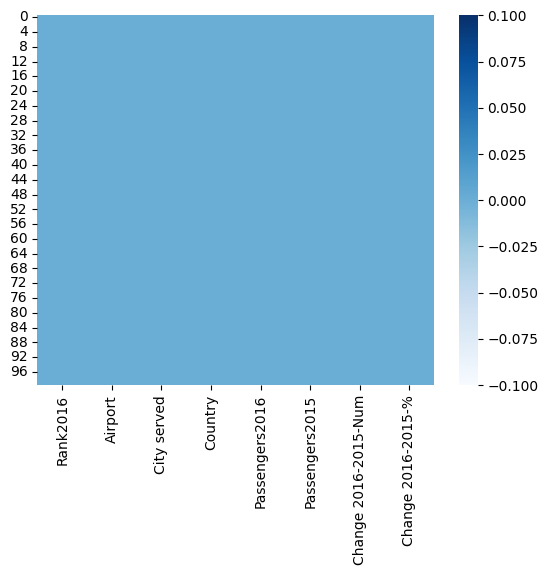

In [13]:
#Visualización de valores nulos en un mapa de calor. En este caso no hay valores nulos

sns.heatmap(df.isnull(), cbar=True, cmap="Blues")

In [14]:
df

,Rank2016,Airport,City served,Country,Passengers2016,Passengers2015,Change 2016-2015-Num,Change 2016-2015-%
0,1,Heathrow Airport,London,United Kingdom,75711130,74985475,725655,"%0,97"
1,2,Charles de Gaulle Airport,Paris,France,65933145,65766986,166159,"%0,25"
2,3,Amsterdam Airport Schiphol,Amsterdam,Netherlands,63625664,58284848,5340816,"%9,16"
3,4,Frankfurt Airport,Frankfurt,Germany,60786937,61032022,-245085,"-%0,40"
4,5,Istanbul Atatürk Airport,Istanbul,Turkey,60415470,61322729,-907259,"-%1,48"
...,...,...,...,...,...,...,...,...
95,96,Turin Airport,Turin,Italy,3943298,3659312,283986,"%7,76"
96,97,Vilnius Airport,Vilnius,Lithuania,3934891,3814001,120890,"%3,17"
97,98,Cagliari Airport,Cagliari,Italy,3689747,3714174,-24427,"-%0,66"
98,99,Leeds Bradford Airport,Leeds,United Kingdom,3612061,3446831,165230,"%4,79"


## 2. Gráficos

2.1- Crea un gráfico de barras que muestre el número de pasajeros en 2016 para los 10 aeropuertos más concurridos.

In [15]:
top10_aropuertos=df.nlargest(10,"Passengers2016" )
top10_aropuertos

,Rank2016,Airport,City served,Country,Passengers2016,Passengers2015,Change 2016-2015-Num,Change 2016-2015-%
0,1,Heathrow Airport,London,United Kingdom,75711130,74985475,725655,"%0,97"
1,2,Charles de Gaulle Airport,Paris,France,65933145,65766986,166159,"%0,25"
2,3,Amsterdam Airport Schiphol,Amsterdam,Netherlands,63625664,58284848,5340816,"%9,16"
3,4,Frankfurt Airport,Frankfurt,Germany,60786937,61032022,-245085,"-%0,40"
4,5,Istanbul Atatürk Airport,Istanbul,Turkey,60415470,61322729,-907259,"-%1,48"
5,6,Adolfo Suárez Madrid–Barajas Airport,Madrid,Spain,50420583,46824838,3595745,"%7,68"
6,7,Barcelona–El Prat Josep Tarradellas Airport,Barcelona,Spain,44154693,39711237,4443456,"%11,19"
7,8,Gatwick Airport,London,United Kingdom,43119628,40269087,2850541,"%7,08"
8,9,Munich Airport,Munich,Germany,42261309,40981522,1279787,"%3,12"
9,10,Leonardo da Vinci–Fiumicino Airport,Rome,Italy,41744769,40463208,1281561,"%3,17"


In [16]:
px.bar(top10_aropuertos, x="Airport", y="Passengers2016", color="Airport", title="Aeropuertos más concurridos en 2016", template="plotly_dark")

In [56]:
fig=px.bar(top10_aropuertos, x="Airport", y="Passengers2016", color="Airport", title="Aeropuertos más concurridos en 2016", template="plotly_dark")
fig.write_html("Aeropuertos más concurridos de 2016.html")

2.2- Genera un gráfico de líneas para comparar la cantidad de pasajeros entre 2015 y 2016 para los 5 aeropuertos principales, asignando un color distinto a cada aeropuerto.

In [18]:
top5_aropuertos2015=df.nlargest(5,"Passengers2015" )
top5_aropuertos2015

,Rank2016,Airport,City served,Country,Passengers2016,Passengers2015,Change 2016-2015-Num,Change 2016-2015-%
0,1,Heathrow Airport,London,United Kingdom,75711130,74985475,725655,"%0,97"
1,2,Charles de Gaulle Airport,Paris,France,65933145,65766986,166159,"%0,25"
4,5,Istanbul Atatürk Airport,Istanbul,Turkey,60415470,61322729,-907259,"-%1,48"
3,4,Frankfurt Airport,Frankfurt,Germany,60786937,61032022,-245085,"-%0,40"
2,3,Amsterdam Airport Schiphol,Amsterdam,Netherlands,63625664,58284848,5340816,"%9,16"


In [19]:
top5_aropuertos2016=df.nlargest(5,"Passengers2016" )
top5_aropuertos2016

,Rank2016,Airport,City served,Country,Passengers2016,Passengers2015,Change 2016-2015-Num,Change 2016-2015-%
0,1,Heathrow Airport,London,United Kingdom,75711130,74985475,725655,"%0,97"
1,2,Charles de Gaulle Airport,Paris,France,65933145,65766986,166159,"%0,25"
2,3,Amsterdam Airport Schiphol,Amsterdam,Netherlands,63625664,58284848,5340816,"%9,16"
3,4,Frankfurt Airport,Frankfurt,Germany,60786937,61032022,-245085,"-%0,40"
4,5,Istanbul Atatürk Airport,Istanbul,Turkey,60415470,61322729,-907259,"-%1,48"


In [20]:
px.line(top5_aropuertos2016, y=["Passengers2016", "Passengers2015"], x="Airport", title="Pasajeros 2015 vs 2016. Aeropuertos más concurridos", template="plotly_dark")

In [58]:
fig=px.line(top5_aropuertos2016, y=["Passengers2016", "Passengers2015"], x="Airport", title="Pasajeros 2015 vs 2016. Aeropuertos más concurridos", template="plotly_dark")
fig.write_html("Pasajeros 2015 vs 2016.html")

2.3- Elabora un histograma para analizar la distribución del cambio porcentual en el número de pasajeros entre 2015 y 2016.

In [21]:
#Como los valores de esta columna eran "object", se han de cambiar primero a "float. Los sobreescribiremos en la tabla del df

df["Change 2016-2015-%"]=df["Change 2016-2015-%"].str.replace("%","").str.replace(",","")    #Reemplazamos. La extracción redondeó los números, esta opción es mejor
df["Change 2016-2015-%"]=df["Change 2016-2015-%"].astype(float)                              #Convertimos en float
df["Change 2016-2015-%"]=df["Change 2016-2015-%"]/100                                        #Dividimos por 100 para conseguir el porcentaje de nuevo
df

,Rank2016,Airport,City served,Country,Passengers2016,Passengers2015,Change 2016-2015-Num,Change 2016-2015-%
0,1,Heathrow Airport,London,United Kingdom,75711130,74985475,725655,0.97
1,2,Charles de Gaulle Airport,Paris,France,65933145,65766986,166159,0.25
2,3,Amsterdam Airport Schiphol,Amsterdam,Netherlands,63625664,58284848,5340816,9.16
3,4,Frankfurt Airport,Frankfurt,Germany,60786937,61032022,-245085,-0.40
4,5,Istanbul Atatürk Airport,Istanbul,Turkey,60415470,61322729,-907259,-1.48
...,...,...,...,...,...,...,...,...
95,96,Turin Airport,Turin,Italy,3943298,3659312,283986,7.76
96,97,Vilnius Airport,Vilnius,Lithuania,3934891,3814001,120890,3.17
97,98,Cagliari Airport,Cagliari,Italy,3689747,3714174,-24427,-0.66
98,99,Leeds Bradford Airport,Leeds,United Kingdom,3612061,3446831,165230,4.79


In [22]:
df["Change 2016-2015-%"]

0     0.97
1     0.25
2     9.16
3    -0.40
4    -1.48
      ... 
95    7.76
96    3.17
97   -0.66
98    4.79
99    3.07
Name: Change 2016-2015-%, Length: 100, dtype: float64

In [48]:
px.histogram(df, x="Change 2016-2015-%", title="Distribución del cambio porcentual en el número de pasajeros entre 2015 y 2016", template="plotly_dark", text_auto=True, opacity=0.5, color_discrete_sequence=["yellowgreen"])

In [65]:
fig=px.histogram(df, x="Change 2016-2015-%", title="Distribución del cambio porcentual en el número de pasajeros entre 2015 y 2016", template="plotly_dark", text_auto=True, opacity=0.5, color_discrete_sequence=["yellowgreen"])
fig.write_html("Distribución del cambio porcentual en el número de pasajeros entre 2015 y 2016.html")

2.4- Desarrolla un diagrama de dispersión que compare el ranking en 2016 con el número de pasajeros en 2016 e incluye una línea de tendencia.

In [59]:
px.scatter(df, y="Passengers2016", x="Rank2016", trendline="ols", title= "Ranking 2016 vs Pasajeros 2016", template="plotly_dark", color="Passengers2016")

In [64]:
fig=px.scatter(df, y="Passengers2016", x="Rank2016", trendline="ols", title= "Ranking 2016 vs Pasajeros 2016", template="plotly_dark", color="Passengers2016")
fig.write_html("Ranking 2016 vs Pasajeros 2016.html")

2.5- Crea un mapa de calor que muestre la correlación entre las variables numéricas del dataset.

In [25]:
correlacion= df[["Rank2016", "Passengers2016", "Passengers2015", "Change 2016-2015-Num", "Change 2016-2015-%"]].corr() 
correlacion_round= correlacion.round(2)
correlacion_round


,Rank2016,Passengers2016,Passengers2015,Change 2016-2015-Num,Change 2016-2015-%
Rank2016,1.00,-0.82,-0.81,-0.45,0.03
Passengers2016,-0.82,1.00,1.00,0.37,-0.17
Passengers2015,-0.81,1.00,1.00,0.31,-0.22
Change 2016-2015-Num,-0.45,0.37,0.31,1.00,0.59
Change 2016-2015-%,0.03,-0.17,-0.22,0.59,1.00


In [61]:
px.imshow(correlacion_round, text_auto=True, title="Correlación entre variables numéricas", template="plotly_dark", color_continuous_scale="RdBu_r")

In [63]:
fig=px.imshow(correlacion_round, text_auto=True, title="Correlación entre variables numéricas", template="plotly_dark", color_continuous_scale="RdBu_r")
fig.write_html("Correlación entre variables numéricas.html")

2.6- Construye un gráfico circular para mostrar la distribución porcentual de pasajeros entre los cinco principales países con aeropuertos en la lista.

In [27]:
numeric_columns=["Passengers2016"]
paises_con_mas_pasajeros= df.groupby("Country")[numeric_columns].sum().nlargest(5,"Passengers2016")
paises_con_mas_pasajeros

,Passengers2016
Country,
United Kingdom,251829624
Germany,207131954
Spain,172274654
France,150265067
Italy,141669795


In [28]:
px.pie(paises_con_mas_pasajeros, values="Passengers2016", names=paises_con_mas_pasajeros.index, title="Distribución porcentual de pasajeros, Top5 países", template="plotly_dark", color_discrete_sequence=px.colors.qualitative.Pastel, hole=0.2)

In [66]:
fig=px.pie(paises_con_mas_pasajeros, values="Passengers2016", names=paises_con_mas_pasajeros.index, title="Distribución porcentual de pasajeros, Top5 países", template="plotly_dark", color_discrete_sequence=px.colors.qualitative.Pastel, hole=0.2)
fig.write_html("Distribución porcentual de pasajeros, Top5 países.html")

2.7- Diseña un gráfico de cajas para analizar la distribución del número de pasajeros en 2016 entre los aeropuertos.

In [29]:
px.box(df, y="Passengers2016", title= "Distribución del número de pasajeros en 2016" , template="plotly_dark", notched=True, points="all", color_discrete_sequence=["yellow"])

In [67]:
fig=px.box(df, y="Passengers2016", title= "Distribución del número de pasajeros en 2016" , template="plotly_dark", notched=True, points="all", color_discrete_sequence=["yellow"])
fig.write_html("Distribución del número de pasajeros en 2016.html")

2.8- Realiza un pairplot para mostrar las relaciones bivariadas entre el "Rank2016", "Passengers2016" y "Passengers2015".

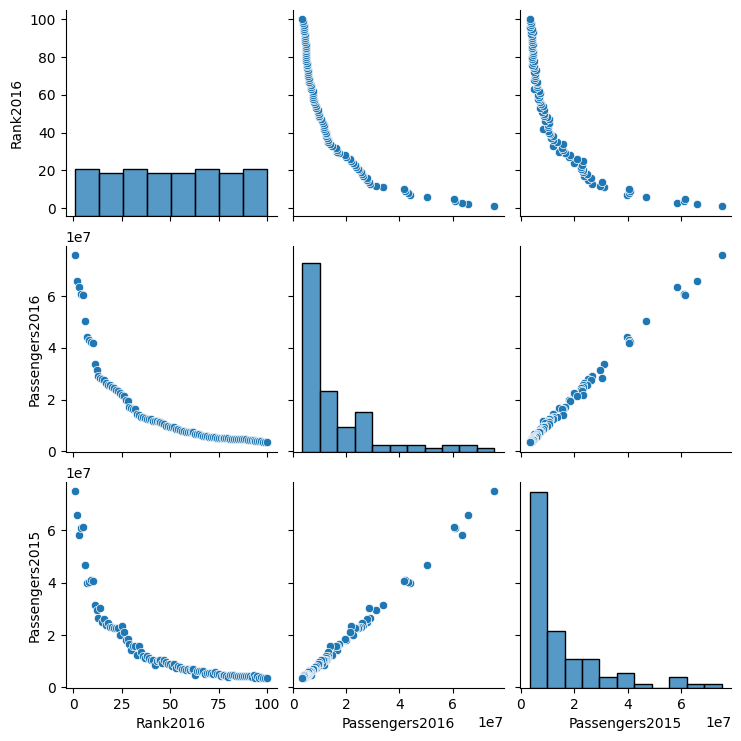

In [69]:
sns.pairplot(df[["Rank2016", "Passengers2016", "Passengers2015"]])

In [31]:
px.scatter_matrix(df[["Rank2016", "Passengers2016", "Passengers2015"]], title="Relaciones bivariadas entre Rank2016, Passengers2016 y Passengers2015", template="plotly_dark", color="Rank2016", height=600)

In [71]:
fig=px.scatter_matrix(df[["Rank2016", "Passengers2016", "Passengers2015"]], title="Relaciones bivariadas entre Rank2016, Passengers2016 y Passengers2015", template="plotly_dark", color="Rank2016", height=600)
fig.write_html("Relaciones bivariadas entre Rank2016, Passengers2016 y Passengers2015.html")

2.9- Produce un gráfico de barras apiladas para comparar el número de pasajeros en 2015 y 2016 para los 10 principales aeropuertos.

In [32]:
px.bar(top10_aropuertos, x=["Passengers2016", "Passengers2015"], y="Airport", title="Aeropuertos más concurridos en 2016", template="plotly_dark", text_auto=True, color_discrete_sequence=["#9467bd", "#bcbd22"])

In [72]:
fig=px.bar(top10_aropuertos, x=["Passengers2016", "Passengers2015"], y="Airport", title="Aeropuertos más concurridos en 2016", template="plotly_dark", text_auto=True, color_discrete_sequence=["#9467bd", "#bcbd22"])
fig.write_html("Aeropuertos más concurridos en 2016.html")

2.10- Elabora un gráfico de líneas para mostrar la tendencia del número de pasajeros desde el aeropuerto más concurrido hasta el menos concurrido en 2016.

In [33]:
concurrencia_ordenada= df.sort_values("Passengers2016", ascending=False)
concurrencia_ordenada

,Rank2016,Airport,City served,Country,Passengers2016,Passengers2015,Change 2016-2015-Num,Change 2016-2015-%
0,1,Heathrow Airport,London,United Kingdom,75711130,74985475,725655,0.97
1,2,Charles de Gaulle Airport,Paris,France,65933145,65766986,166159,0.25
2,3,Amsterdam Airport Schiphol,Amsterdam,Netherlands,63625664,58284848,5340816,9.16
3,4,Frankfurt Airport,Frankfurt,Germany,60786937,61032022,-245085,-0.40
4,5,Istanbul Atatürk Airport,Istanbul,Turkey,60415470,61322729,-907259,-1.48
...,...,...,...,...,...,...,...,...
95,96,Turin Airport,Turin,Italy,3943298,3659312,283986,7.76
96,97,Vilnius Airport,Vilnius,Lithuania,3934891,3814001,120890,3.17
97,98,Cagliari Airport,Cagliari,Italy,3689747,3714174,-24427,-0.66
98,99,Leeds Bradford Airport,Leeds,United Kingdom,3612061,3446831,165230,4.79


In [74]:
px.line(concurrencia_ordenada, y="Passengers2016", x="Airport", title="Tendencia en el número de pasajeros en 2016", template="plotly_dark", markers=True, color="Airport", width=1700, height=800)

In [75]:
fig=px.line(concurrencia_ordenada, y="Passengers2016", x="Airport", title="Tendencia en el número de pasajeros en 2016", template="plotly_dark", markers=True, color="Airport", width=1700, height=800)
fig.write_html("Tendencia en el número de pasajeros en 2016.html")

2.11- Crea un diagrama de violín para comparar la distribución del cambio de pasajeros (2016-2015) entre los países representados en el dataset.

In [35]:
px.violin(df, x="Change 2016-2015-Num", y="Country", color="Country", title="Distribución del cambio en el número de pasajeros por países entre 2016-2015",template="plotly_dark", box=True, height=600, points="all")

In [76]:
fig=px.violin(df, x="Change 2016-2015-Num", y="Country", color="Country", title="Distribución del cambio en el número de pasajeros por países entre 2016-2015",template="plotly_dark", box=True, height=600, points="all")
fig.write_html("Distribución del cambio en el número de pasajeros por países entre 2016-2015.html")

2.12- Genera un gráfico de áreas que ilustre cómo cambia el número de pasajeros entre los aeropuertos del top 5 en 2016.

In [36]:
top5_aeropuertos=df.nlargest(5,"Passengers2016" )
top5_aeropuertos

,Rank2016,Airport,City served,Country,Passengers2016,Passengers2015,Change 2016-2015-Num,Change 2016-2015-%
0,1,Heathrow Airport,London,United Kingdom,75711130,74985475,725655,0.97
1,2,Charles de Gaulle Airport,Paris,France,65933145,65766986,166159,0.25
2,3,Amsterdam Airport Schiphol,Amsterdam,Netherlands,63625664,58284848,5340816,9.16
3,4,Frankfurt Airport,Frankfurt,Germany,60786937,61032022,-245085,-0.40
4,5,Istanbul Atatürk Airport,Istanbul,Turkey,60415470,61322729,-907259,-1.48


In [37]:
px.area(top5_aeropuertos,  x="Airport", y="Change 2016-2015-Num", color="Airport", title="Cambio del número de pasajeros, Top5 aeropuertos", template="plotly_dark")

In [77]:
fig=px.area(top5_aeropuertos,  x="Airport", y="Change 2016-2015-Num", color="Airport", title="Cambio del número de pasajeros, Top5 aeropuertos", template="plotly_dark")
fig.write_html("Cambio del número de pasajeros, Top5 aeropuertos.html")

2.13- Implementa un mapa interactivo que muestre la ubicación de cada aeropuerto junto con su volumen de pasajeros en 2016.

In [38]:
!pip install geopy

In [39]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='airport_location')

# Creamos una nueva columna llamada 'Location' que contiene las coordenadas de los aeropuertos
df['Latitude'] = df['Airport'].apply(lambda x: geolocator.geocode(x).latitude if geolocator.geocode(x) else None)
df['Longitude'] = df['Airport'].apply(lambda x: geolocator.geocode(x).longitude if geolocator.geocode(x) else None)


In [40]:
df.head(2)

,Rank2016,Airport,City served,Country,Passengers2016,Passengers2015,Change 2016-2015-Num,Change 2016-2015-%,Latitude,Longitude
0,1,Heathrow Airport,London,United Kingdom,75711130,74985475,725655,0.97,51.467739,-0.458780
1,2,Charles de Gaulle Airport,Paris,France,65933145,65766986,166159,0.25,49.006891,2.571082


In [44]:
fig=px.scatter_mapbox(df, lat="Latitude", lon="Longitude", title="Volumen pasajeros 2016 por aeropuerto",size="Passengers2016", color="City served", template="plotly_dark")
fig.show()


In [78]:
fig=px.scatter_mapbox(df, lat="Latitude", lon="Longitude", title="Volumen pasajeros 2016 por aeropuerto",size="Passengers2016", color="City served", template="plotly_dark")
fig.write_html("Volumen pasajeros 2016 por aeropuerto.html")

2.14- Crea un gráfico de regresión para analizar la relación entre el ranking de 2016 y el cambio numérico de pasajeros de 2015 a 2016.

In [42]:
px.scatter(df, x="Rank2016", y="Change 2016-2015-Num", title="Ranking de aeropuertos de 2016 vs Cambio numérico de pasajeros entre 2015 y 2016", trendline="ols", template="plotly_dark", color="Change 2016-2015-Num")

In [79]:
fig=px.scatter(df, x="Rank2016", y="Change 2016-2015-Num", title="Ranking de aeropuertos de 2016 vs Cambio numérico de pasajeros entre 2015 y 2016", trendline="ols", template="plotly_dark", color="Change 2016-2015-Num")
fig.write_html("Ranking de aeropuertos de 2016 vs Cambio numérico de pasajeros entre 2015 y 2016.html")

2.15- Diseña un gráfico de barras horizontales que muestre el cambio porcentual de pasajeros para cada aeropuerto entre 2015 y 2016.

In [45]:
px.bar(df, y="Airport", x="Change 2016-2015-%", template="plotly_dark", title="Cambio porcentual entre 2015 y 2016", color="Airport", orientation="h", height=600)

In [80]:
fig=px.bar(df, y="Airport", x="Change 2016-2015-%", template="plotly_dark", title="Cambio porcentual entre 2015 y 2016", color="Airport", orientation="h", height=600)
fig.write_html("Cambio porcentual entre 2015 y 2016.html")